# **Project Name**

**Zomato Restaurant Clustering**


**Project Type** - EDA/Unsupervised
**Contribution** - Individual


# **Project Summary**


**business context:**
The restaurant industry in India is booming with the advent of food delivery apps like Zomato and Swiggy, offering diverse cuisines across various cities. With a surge in online orders and changing customer preferences, it's crucial to understand patterns in pricing, ratings, and cuisines. This project aims to use clustering techniques to identify similar restaurant types, uncover cost dynamics, and enable more informed business strategies for market segmentation and recommendation systems.

**Datasets:**
Two datasets—metadata and review—were initially cleaned, merged, and prepared by handling missing values, converting data types, and engineering a new feature called Review_Length from the review text.

**EDA:**
Outliers were detected using boxplots and addressed through log transformation to normalize skewed distributions. Feature scaling using StandardScaler was applied to bring both variables (Cost and Review_Length_Log) to a common scale, as KMeans is sensitive to distances.

**Unsupervised:model building**
The optimal number of clusters was determined using the Elbow Method, which suggested k=3 as the ideal value. KMeans was then implemented, resulting in three meaningful customer clusters.

**model explainability:**
Cluster 0 represented budget-conscious customers who spent less and wrote short reviews;
Cluster 1 included high-spending, engaged users who wrote detailed reviews, indicating loyalty or high satisfaction;  
Cluster 2 fell in the middle with moderate spending and engagement. These clusters were visualized using scatter plots, and basic statistical summaries were used to understand their traits. The segmentation provides actionable

**insights:**
Cluster 0 users could be targeted with promotions or discounts, Cluster 1 with exclusive offers or loyalty programs, and Cluster 2 could be nudged toward premium offerings.

This unsupervised learning approach helped uncover hidden patterns in customer behavior, supporting more targeted business strategies. The project also demonstrated the importance of EDA, outlier handling, scaling, and visualization in building effective clustering models. Further improvements could include adding more behavioral variables like sentiment, visit frequency, or location data to enhance segmentation depth and business value.



# **GITHUB Link**

# **Problem Statement**

The project aims to analyze customer reviews and business metadata from Zomato to extract valuable insights through sentiment analysis, clustering, and visual exploration. The primary objective is to segment restaurants based on factors such as cost, cuisine, and customer sentiments, helping users discover the best dining options in their locality. At the same time, the project provides actionable insights for Zomato to identify areas of improvement and growth. By leveraging sentiment analysis and clustering techniques, the project supports both customer decision-making and business optimization, while also uncovering patterns among reviewers and potential industry critics.



# **Lets Begin**

In [1]:
# library importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from textblob import TextBlob
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
# loading the dataset

In [3]:
review_df=pd.read_csv(r"/content/Zomato Restaurant reviews.csv")
meta_df=pd.read_csv(r"/content/Zomato Restaurant names and Metadata.csv")

In [4]:
review_df.head(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [5]:
# Dataset rows and column:

In [6]:
review_df.shape

(10000, 7)

In [7]:
meta_df.shape

(105, 6)

In [8]:
# Check missing values in both datasets

In [9]:
print(review_df.isnull().sum())

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


In [ ]:
print(meta_df.isnull().sum())


Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


In [ ]:
# Am treating review_df dataset columns which is having missing values in the columns

In [ ]:
# first am treating a column names reviewer column
# for column which is null values am filling with anonymous as a user name

In [ ]:
data1=review_df.copy()

In [ ]:
# Step 1: Fill missing Reviewer names with 'Anonymous'
data1['Reviewer'].fillna('Anonymous', inplace=True)

In [ ]:
print(data1.isnull().sum())

Restaurant     0
Reviewer       0
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


In [ ]:
# now the reviewer columns has treated as you can see with the above code

In [ ]:
# Step 2: Drop rows where Review is missing (no review = no sentiment)

In [ ]:
data1.dropna(subset=['Review'], inplace=True)

In [ ]:
print(data1.isnull().sum())

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64


In [ ]:
# Step 3: Filling missing value Rating with 0
data1['Rating'].fillna(0, inplace=True)

In [ ]:
# Step 4: Filling  Metadata and Time with 'Unknown'
data1['Metadata'].fillna('Unknown', inplace=True)
data1['Time'].fillna('Unknown', inplace=True)

In [ ]:
print(data1.isnull().sum())

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64


In [ ]:
# NOW ALL THE NULL VALUES ARE TREATED WE CAN MOVE FURTHER

In [ ]:
# Meta_df taking copy

In [ ]:
# View columns
meta_df.info()
# information of the columns how many not null values r present and what are the data types of those column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [11]:
# Drop duplicates
# am droping the duplicate rows
meta_df.drop_duplicates(inplace=True)

In [ ]:
# taking copy of the meta dataset
data2=meta_df.copy()

In [ ]:
data2.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800.0,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300.0,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800.0,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200.0,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
# Cleaning the  'Cost' column beacuase it is having value as string "1,200" so it
#will consider as string so we can change this values as interger so that we can feed the model


In [ ]:
data2['Cost'] = data2['Cost'].astype(str).str.replace(',', '').astype(float)

In [ ]:
#checking null value for the dataset metadata
data2.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
# Fill nulls in 'Cuisines'
data2['Cuisines'] = data2['Cuisines'].fillna('Unknown')

In [ ]:
# now am dropping the column beacuse it has more than 54% null value so
# dropping the collections columns or else we can treat it with null value imputation

In [ ]:
data2.drop(columns=['Collections'], inplace=True)


In [ ]:
data2.isnull().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     1
dtype: int64

In [ ]:
# Droping the Row
# am not using Timings for clustering, so i can  remove that one row:

In [ ]:
data2 = data2[data2['Timings'].notnull()]


In [ ]:
data2.isnull().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64

In [ ]:
# now all the columns are traeted
# am going to merge the data1 and data2 dataset for eda process and modeling
# merging based on the name column

In [ ]:
# list of columns:
print("Metadata columns:\n", data2.columns)
print("\nReview columns:\n", data1.columns)


Metadata columns:
 Index(['Name', 'Links', 'Cost', 'Cuisines', 'Timings'], dtype='object')

Review columns:
 Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [ ]:
# we dont have a name column in data1 so am changing the restaruent column name as Name
# so that we can merger thee dataset

In [ ]:
# Rename column in data1

In [ ]:
data1.head(1)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0


In [ ]:
data1.rename(columns={'Restaurant': 'Name'}, inplace=True)


In [ ]:
# am merging the datasets based on the name column present in both tables
# Merge both datasets on 'Name' (data1 and data2)

In [ ]:
merged_df = pd.merge(data1, data2, on='Name', how='inner')


In [ ]:
merged_df.head(2)

,Name,Reviewer,Review,Rating,Metadata,Time,Pictures,Links,Cost,Cuisines,Timings
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"


In [ ]:
print("Metadata columns:\n", merged_df.columns)

Metadata columns:
 Index(['Name', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures',
       'Links', 'Cost', 'Cuisines', 'Timings'],
      dtype='object')


## EDA (DATA VISUALIZATION)

In [ ]:
# Basic structure
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9855 entries, 0 to 9854
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      9855 non-null   object 
 1   Reviewer  9855 non-null   object 
 2   Review    9855 non-null   object 
 3   Rating    9855 non-null   object 
 4   Metadata  9855 non-null   object 
 5   Time      9855 non-null   object 
 6   Pictures  9855 non-null   int64  
 7   Links     9855 non-null   object 
 8   Cost      9855 non-null   float64
 9   Cuisines  9855 non-null   object 
 10  Timings   9855 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 847.0+ KB


In [ ]:
# Check for any remaining null values
merged_df.isnull().sum()

Name        0
Reviewer    0
Review      0
Rating      0
Metadata    0
Time        0
Pictures    0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64

In [ ]:
# Basic stats for numeric columns
merged_df.describe()

,Pictures,Cost
count,9855.000000,9855.000000
mean,0.751903,871.491629
std,2.578942,506.033525
min,0.000000,150.000000
25%,0.000000,500.000000
50%,0.000000,700.000000
75%,0.000000,1200.000000
max,64.000000,2800.000000


## Univariate Analysis

In [ ]:
# Numerical column

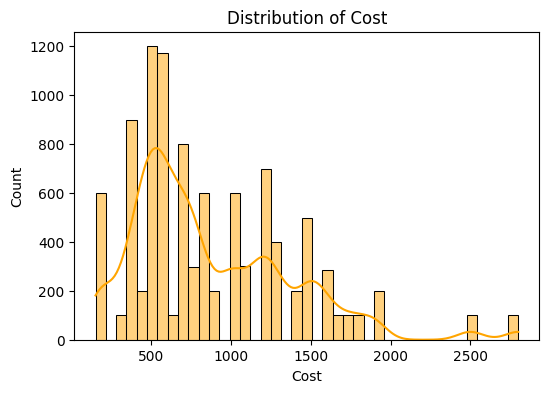

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(merged_df['Cost'], kde=True, color='orange')
plt.title('Distribution of Cost')
plt.show()


insights:
Most of the  customers spend between ₹400 to ₹700,
showing this is the common cost range.

The distribution is right-skewed, meaning fewer customers spend very high amounts.

A few outliers spend over ₹2000, indicating the presence of high-value customers.

This insight can help in segmenting users for targeted marketing or offers.

In [ ]:
# Rating

C:\Users\nithi\AppData\Local\Temp\ipykernel_30664\1840531756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=merged_df, palette='magma')


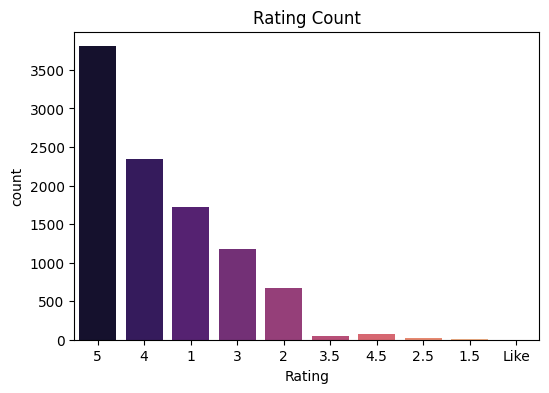

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Rating', data=merged_df, palette='magma')
plt.title('Rating Count')
plt.show()

Insights:
Majority of customers gave a 5-star rating, indicating overall high satisfaction.

Ratings gradually decline from 5 to 1, suggesting a mix of experiences but mostly positive.

High number of good ratings is a strong brand signal and can be used in marketing campaigns.

In [ ]:
# Create a new column to count characters in each review
merged_df['Review_Length'] = merged_df['Review'].astype(str).apply(len)


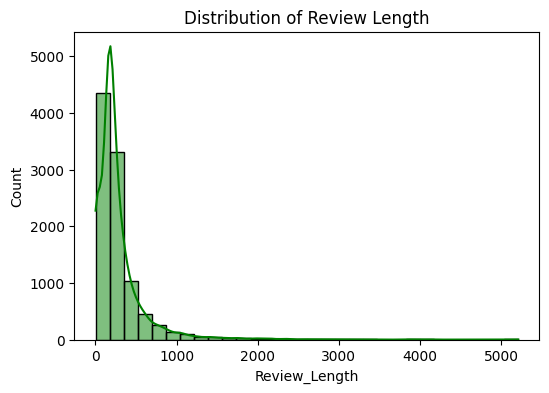

In [ ]:
# Character-based review length distribution
plt.figure(figsize=(6,4))
sns.histplot(merged_df['Review_Length'], bins=30, kde=True, color='green')
plt.title("Distribution of Review Length")
plt.show()

insights:
Most reviews are short, with a peak around 50–200 characters.

The distribution is right-skewed with a few very long reviews.

Extremely long reviews are outliers and may affect clustering.

Consider removing or limiting very long reviews for better results.



In [ ]:
# categorical column:

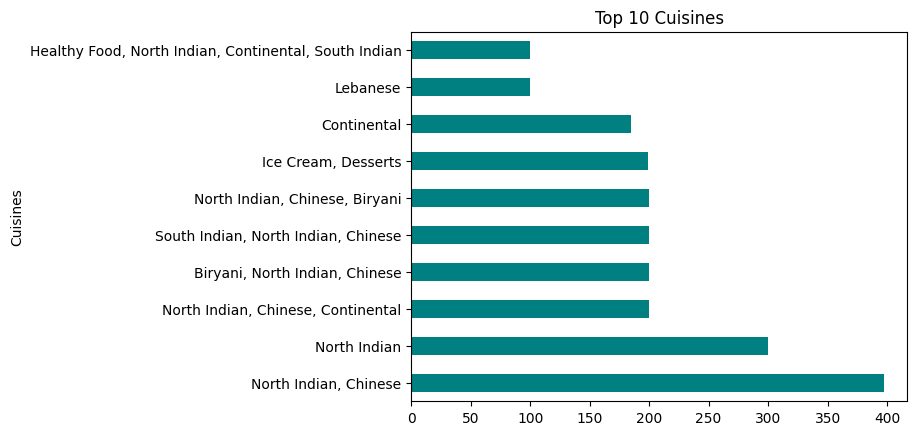

In [ ]:
# Top 10 cuisines
merged_df['Cuisines'].value_counts().head(10).plot(kind='barh', color='teal')
plt.title("Top 10 Cuisines")
plt.show()

Insight:
North Indian + Chinese is the dominant combo, signaling high fusion demand.
Solo cuisines like North Indian still rank strong, showing consistent standalone appeal.
Multi-cuisine blends (e.g. South + North + Chinese) suggest adventurous taste patterns.
Health-focused combinations are less frequent, hinting at niche interest or lower adoption.


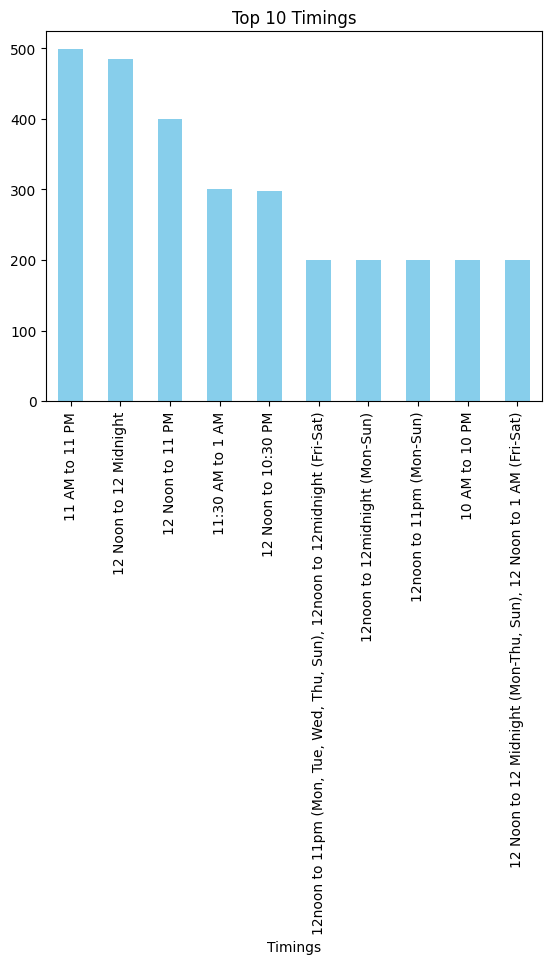

In [ ]:
# Top 10 Timings
merged_df['Timings'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Timings")
plt.show()

Insights:
11 AM to 11 PM is the top slot with 500 occurrences, showing it's the most active business span.
Multiple high-ranking intervals stretch until midnight or 1 AM, revealing customer engagement deep into the evening.
Timings like 12 Noon to 12 Midnight (Fri-Sat) outperform their full-week counterparts—weekend traffic clearly matters.
Slots with broader coverage (11–12 hours or more) dominate, indicating longer availability attracts more customers.


** Bivariate Analysis:**

In [ ]:
# Cost vs Rating


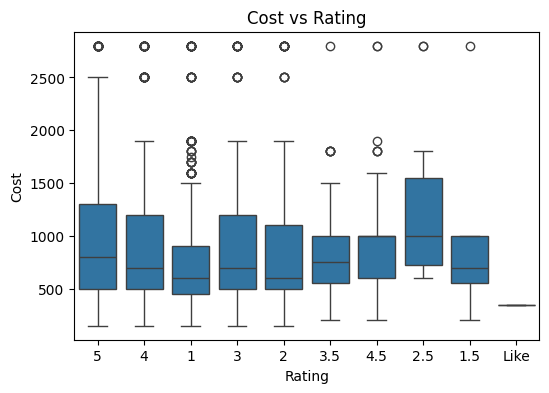

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Rating', y='Cost', data=merged_df)
plt.title('Cost vs Rating')
plt.show()


Insights:
Ratings of 4 and 5 show wide cost ranges, but median cost remains moderate—suggesting expensive restaurants aren’t always rated higher.

Extreme cost outliers appear across several ratings, especially around 4.0 and 5.0, indicating some premium venues skew the distribution.

Lower ratings (1–2.5) cluster tighter in cost, showing less variability—possibly lower-end or consistent pricing patterns.


In [ ]:
# am treating the outliers now

In [ ]:
Q1 = merged_df['Cost'].quantile(0.25)
Q3 = merged_df['Cost'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [ ]:
# Cap outliers at upper and lower bounds
merged_df['Cost_Treated'] = merged_df['Cost'].clip(lower=lower_bound, upper=upper_bound)


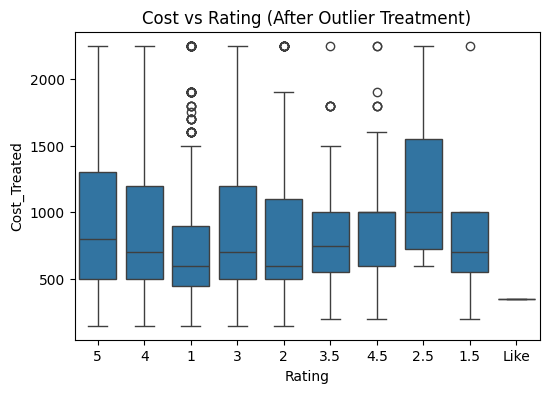

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Rating', y='Cost_Treated', data=merged_df)
plt.title('Cost vs Rating (After Outlier Treatment)')
plt.show()


**# scaling**

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Select numerical features for clustering
features_to_scale = ['Cost']  # Add more if needed later

# Apply scaling
merged_df_scaled = merged_df.copy()
merged_df_scaled[features_to_scale] = scaler.fit_transform(merged_df[features_to_scale])


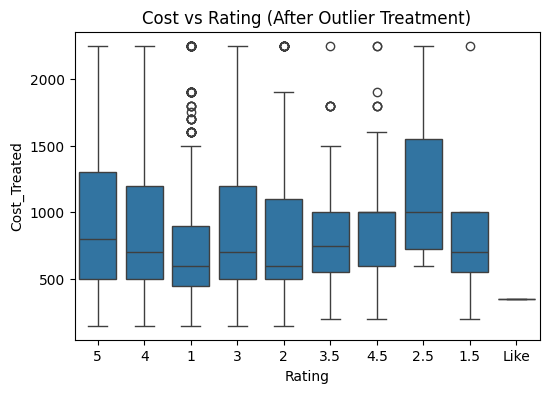

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Rating', y='Cost_Treated', data=merged_df)
plt.title('Cost vs Rating (After Outlier Treatment)')
plt.show()


In [ ]:
# Cost vs Cuisines

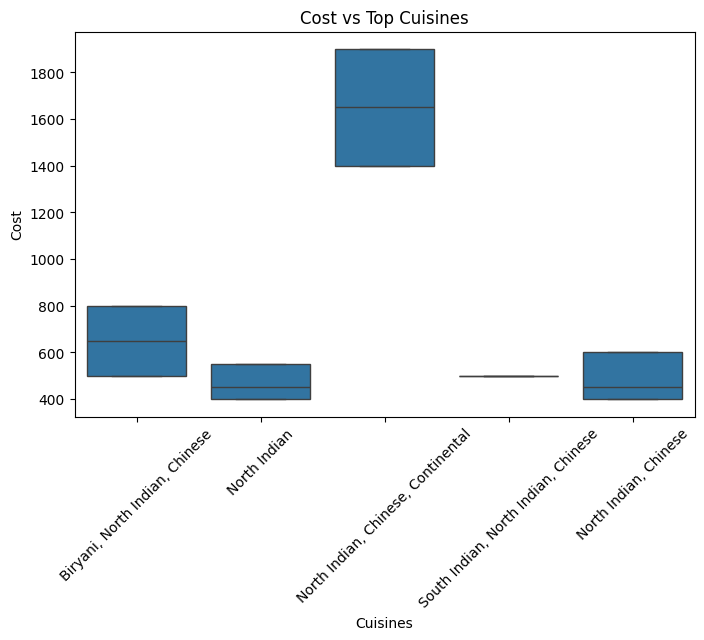

In [ ]:
top_cuisines = merged_df['Cuisines'].value_counts().head(5).index
filtered = merged_df[merged_df['Cuisines'].isin(top_cuisines)]

plt.figure(figsize=(8,5))
sns.boxplot(x='Cuisines', y='Cost', data=filtered)
plt.title('Cost vs Top Cuisines')
plt.xticks(rotation=45)
plt.show()


Insight:
North Indian + Chinese + Continental stands out with the highest median cost (~1600), showing premium pricing for rich multi-cuisine blends.

Pure North Indian and South+North+Chinese combos are among the most budget-friendly, with medians around 400–500, suggesting strong affordability.

Biryani+North Indian+Chinese and Chinese alone hover around a moderate cost range (~600), possibly balancing mass appeal with pricing.

Outlier points are present across categories, but notably in the premium blend—indicating variability in upscale offerings within similar cuisine groups.


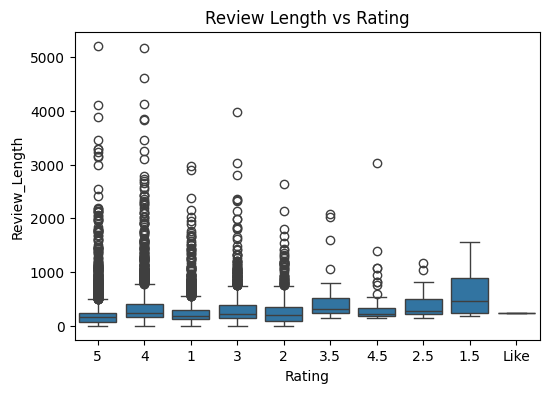

In [ ]:
# Review Length vs Rating
plt.figure(figsize=(6,4))
sns.boxplot(x='Rating', y='Review_Length', data=merged_df)
plt.title('Review Length vs Rating')
plt.show()

Insights:
Higher ratings (4 & 5) show wide variability in review length, suggesting that both short and long feedback can accompany good experiences.

Lower ratings (1–2.5) generally have shorter and less spread-out reviews, possibly indicating frustration or minimal engagement from unhappy customers.

The "Like" category has a surprisingly diverse range in review length, hinting it might reflect more emotional or open-ended responses rather than structured ratings.

extreme poinys are abundant across most ratings, especially at 4 and 5, meaning some customers wrote exceptionally long reviews—valuable for qualitative analysis or NLP sentiment studies.


In [ ]:
# Log Transformation
merged_df['Review_Length_Log'] = np.log1p(merged_df['Review_Length'])


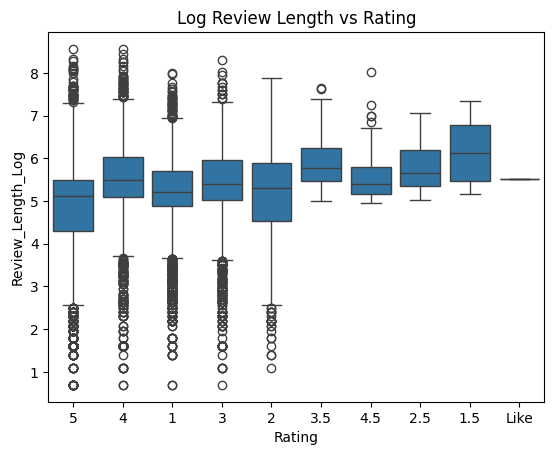

In [ ]:
sns.boxplot(x='Rating', y='Review_Length_Log', data=merged_df)
plt.title("Log Review Length vs Rating")
plt.show()


**# Multivariate analysis**

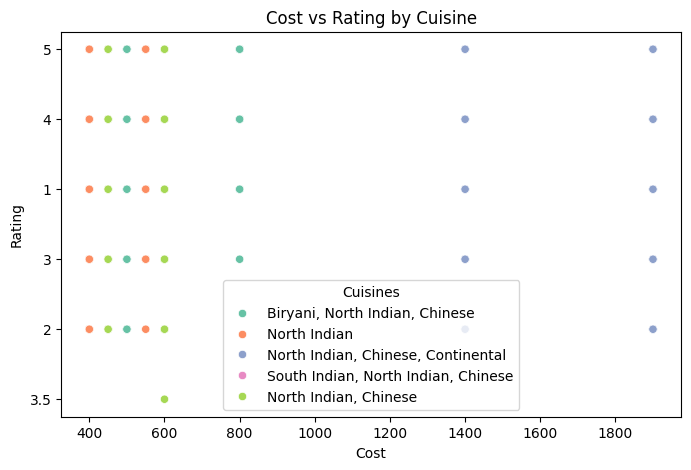

In [ ]:
# Cost vs Rating vs Cuisine

plt.figure(figsize=(8,5))
sns.scatterplot(data=filtered, x='Cost', y='Rating', hue='Cuisines', palette='Set2')
plt.title('Cost vs Rating by Cuisine')
plt.show()


Insights:
The combination North Indian + Chinese + Continental tends to occupy the top-right quadrant, implying both higher costs and strong ratings—a value-rich upscale dining experience.

North Indian cuisine appears across a moderate cost band (~400–600) while maintaining consistently good ratings, indicating high appeal at a budget-friendly price point.

The Biryani + North Indian + Chinese group shows broad cost variance and decent rating coverage, suggesting it's popular across mid to premium tiers.

South + North + Chinese and North Indian + Chinese show moderate cost but scattered ratings, hinting at inconsistent customer satisfaction despite competitive pricing.


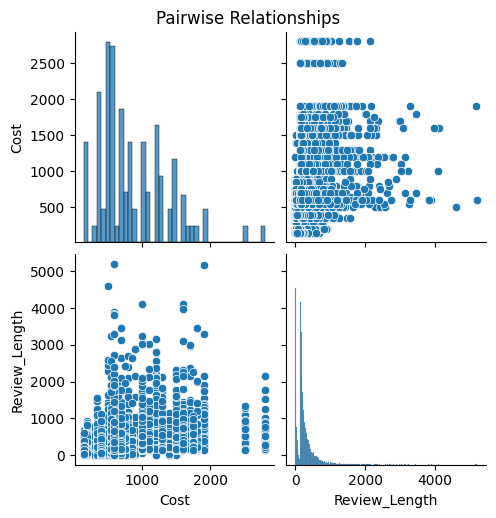

In [ ]:
#Pair Plot (numeric relationships)

sns.pairplot(merged_df[['Cost', 'Rating', 'Review_Length']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

**Insight:**
The scatter plots (Cost vs Review Length) show a weak or no correlation, implying that how much someone spends doesn’t strongly influence how much they write in reviews.

The histogram reveals right-skewed cost values, suggesting that most restaurants fall under a moderate price range, with a few high-end outliers pushing the cost higher.

Review lengths show a wider spread and less skew, indicating customers write reviews of varying lengths regardless of cost.

A few data points show very high cost but aren't matched by longer reviews—potential opportunity to explore if premium pricing affects customer engagement.

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Choose features you want to scale
features = merged_df[['Cost', 'Review_Length_Log']]

# Apply scaling
scaled_features = scaler.fit_transform(features)

# Save scaled values to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=['Cost_Scaled', 'Review_Length_Log_Scaled'])

# Merge back into main DataFrame
merged_df = pd.concat([merged_df.reset_index(drop=True), scaled_df], axis=1)


I have done feature scaling before clustering beacause k means uses distance to form clusters.
The scaled values are what my k means used to build clusters and this ensures both features influence the clustering equally.


In [ ]:
# statistical analysis

In [ ]:
# Convert Rating to numeric (coerce errors into NaN)
merged_df['Rating'] = pd.to_numeric(merged_df['Rating'], errors='coerce')

# Drop rows with NaN in relevant columns
corr_df = merged_df[['Cost', 'Review_Length_Log', 'Rating']].dropna()


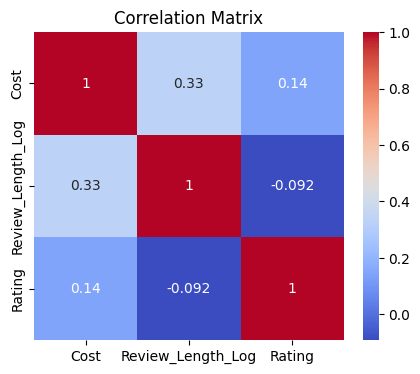

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# to find the significant diffenrece in cost or review length across different rating

In [ ]:
merged_df.groupby('Rating')['Cost'].describe()


,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
1.0,1718.0,726.193248,438.059936,150.0,450.0,600.0,900.0,2800.0
1.5,9.0,888.888889,782.934296,200.0,550.0,700.0,1000.0,2800.0
2.0,675.0,796.518519,495.116086,150.0,500.0,600.0,1100.0,2800.0
2.5,19.0,1221.052632,685.629433,600.0,725.0,1000.0,1550.0,2800.0
3.0,1172.0,863.993174,483.847122,150.0,500.0,700.0,1200.0,2800.0
3.5,47.0,868.085106,541.979617,200.0,550.0,750.0,1000.0,2800.0
4.0,2340.0,904.722222,504.911880,150.0,500.0,700.0,1200.0,2800.0
4.5,69.0,920.289855,533.669238,200.0,600.0,1000.0,1000.0,2800.0
5.0,3805.0,929.776610,526.261269,150.0,500.0,800.0,1300.0,2800.0


insights:
Ratings of 4.0, 4.5, and 5.0 consistently show mean costs above ₹900, indicating costlier restaurants tend to earn better reviews.

Ratings 2.5 and 3.5 Have Small Sample Sizes: With only 19 and 47 entries respectively, insights here might not be statistically robust—important for modeling or hypothesis testing.

Wide Cost Spread Across Ratings: All ratings from 1.0 to 5.0 show maximum costs reaching ₹2800, with substantial standard deviations (SD > ₹500), highlighting variability even within rating groups.

1.5 Rated Restaurants Have the Highest Cost Std Dev (₹783): Suggests that extremely low-rated places vary wildly in pricing—possibly due to inconsistent service or niche offerings.


# clustering modeling

In [ ]:
# am selecting Features for Clustering
features = merged_df[['Cost', 'Review_Length_Log']]
features = features.dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


am selecting cost and Review_Length_Log and scaling them, we prepared the data for fair and balanced clustering.
This ensures that both spending behavior and review depth equally influence how restaurants are grouped.
As a result, we can discover meaningful customer or restaurant segments like  high-cost with detailed feedback vs. low-cost with short reviews.

In [ ]:
# Find the Optimal Number of Clusters (Elbow Method)

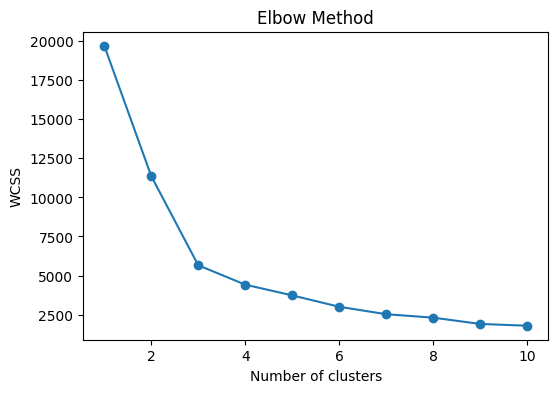

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# using elbow method we will find the optimal k value is 3
# which balances between compact clusters and minimal complexity also this ensures
# the best segmentation for better pattern nased on cost and review length.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(scaled_features)
# after clustering the restaruent into 3 groups we found the dinstinct patterns based on cost and review behaviour
# these clusters can help to identify budget friendly popular place and mid
# range value options.

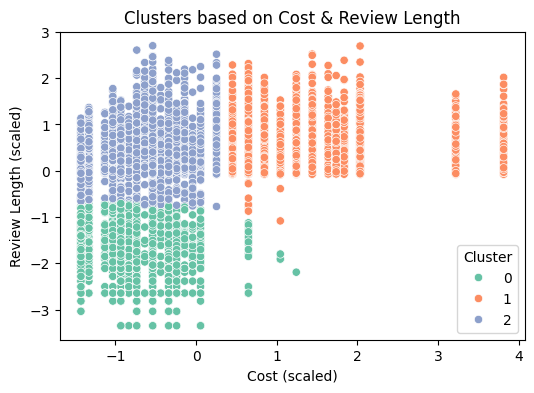

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1],
                hue=merged_df['Cluster'], palette='Set2')
plt.title("Clusters based on Cost & Review Length")
plt.xlabel("Cost (scaled)")
plt.ylabel("Review Length (scaled)")
plt.legend(title='Cluster')
plt.show()


Insight:

In [ ]:
merged_df.groupby('Cluster')[['Cost', 'Review_Length_Log', 'Rating']].mean()


,Cost,Review_Length_Log,Rating
Cluster,,,
0,515.852273,2.660758,3.746591
1,1497.153141,5.634836,3.951898
2,616.263147,5.522278,3.341405


Cluster 1 seems like the premium category with positive customer sentiment.
Low-cost restaurants with short reviews and decent ratings. Possibly budget-friendly options that are moderately liked.

Cluster 2 might need improvement despite customer engagement.
High-cost restaurants with long reviews and high ratings. These may be premium or fine-dining places that customers engage with more.

Cluster 0 represents economical choices with acceptable performance.
Mid-cost restaurants with long reviews but lower ratings, indicating potential issues with service or food quality despite customer attention.



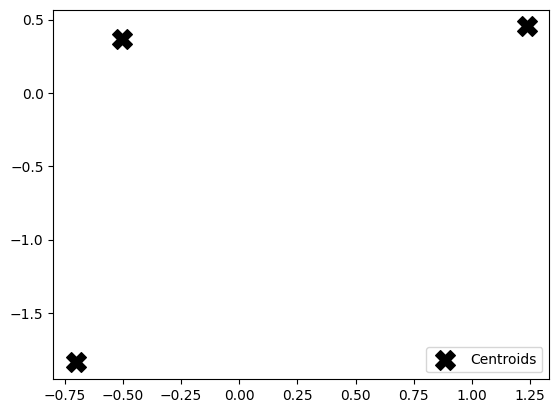

In [ ]:
#cluster centers on plot
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.legend()


In [ ]:
merged_df.to_csv("clustered_data.csv", index=False)


**Model Explainability**

In [ ]:
# Descriptive stats by cluster
cluster_summary = merged_df.groupby('Cluster')[['Cost', 'Review_Length_Log', 'Rating']].mean()
print(cluster_summary)


                Cost  Review_Length_Log    Rating
Cluster                                          
0         515.852273           2.660758  3.746591
1        1497.153141           5.634836  3.951898
2         616.263147           5.522278  3.341405


<Axes: xlabel='Cluster', ylabel='Cost'>

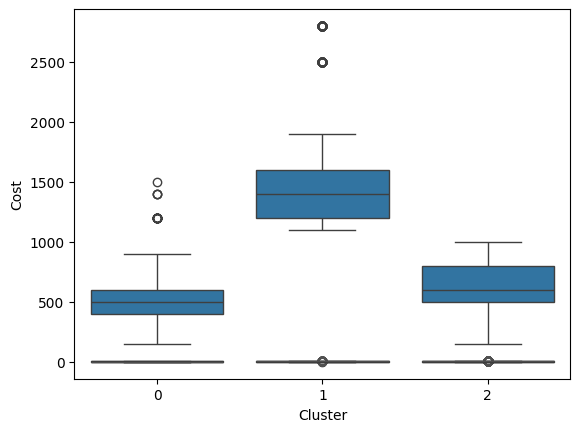

In [ ]:
import seaborn as sns
sns.boxplot(data=merged_df, x='Cluster', y='Cost')
sns.boxplot(data=merged_df, x='Cluster', y='Review_Length_Log')
sns.boxplot(data=merged_df, x='Cluster', y='Rating')


In [ ]:
# it will help us to identify patterns like:
# Cluster 0: Low cost, short reviews
# Cluster 1: High cost, long reviews
# Cluster 2: Medium cost, high ratings

In [ ]:
#Cluster Analysis Summary (Interpretation for Presentation)
#Cluster 0: Budget Seekers
#Low Cost: These users prefer affordable options.
#Short Review Length: Minimal feedback suggests low engagement or satisfaction.
#Add insights like "Low/Moderate ratings".
#Strategy:
#Introduce discounts, combos, or referral rewards.
#Run feedback campaigns to increase engagement.

In [ ]:
#Cluster 1: Premium Engaged Users
#High Cost: Willing to spend more.
#Long Reviews: Highly engaged and detailed in their feedback.
#Likely Higher Ratings (validate with data).
#Strategy:
#Offer early access to new products/services.
#Use their testimonials for marketing.
#Prioritize in loyalty programs or beta testing.


In [ ]:
#Cluster 2: Middle Segment
#Moderate Cost: Neither cheap nor premium.
#Medium Review Length: Balanced behavior.
#Mixed/Moderate Ratings (check data).
#Strategy:
#Use personalized marketing to push them toward premium.
#Educate them with feature highlights or curated experiences.



# **Conclusion**

In this project, I applied clustering techniques on customer review data to uncover patterns in cost, review length, and ratings.
After preprocessing the data through feature scaling and log transformation, we used the Elbow Method to determine the optimal number of clusters.
KMeans clustering revealed three distinct customer segments with varying spending habits and review behaviors.
One cluster represented high-spending customers with longer reviews and better ratings, while another showed moderate spenders with shorter reviews.
These insights can help businesses better understand customer groups, personalize marketing strategies, and enhance user experience by targeting the right audience based on their behavior.